# Craft a Story from a Dataset: Finding the Unhealthiest Starbucks Drink

## Overview

In this jupyter notebook, I will try to craft a story around finding the unhealthiest drink on the starbucks menu, using the kaggle “Nutrition Facts for Starbucks Menu” dataset. I will load and examine the dataset and try to find creative ways to identify which drink is likely the most unhealthy on the starbucks menu. 

I plan to create bar charts of each variable and then choose the least healthy drink based on which is at the top of most bar charts. In addition, the bar charts will allow me to visualize the quantitative difference between the top 10 least unhealthy drinks in each category, as well as see other top contenders in each category. Bar charts will also allow me to visualize by what margin the drink with the most, say sugar, has more sugar than other sugar-heavy drinks. Bar charts will be created for every variable in both of the kaggle starbucks datasets, except for those variables that correspond to healthy attributes, such as fiber and protein.

In [1]:
# In the following few lines, I perform the first steps...
# importing necessary libraries, loading in the datasets from the kaggle page
# and examining the data using .head() and .info().

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [4]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
df2 = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

In [6]:
df2.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [9]:
# In the following lines, I use more functions to attempt to get an even better feel for the data, before 
# visualizations are performed. 
# I also rename the columns so that they are easier to work with.

In [10]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [12]:
df.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_%_dv,vitamin_c_%_dv,calcium_%_dv,iron_%_dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [13]:
df2.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [14]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.','')

In [15]:
df2.head()

,unnamed:_0,calories,fat_g,carb_g,fiber_g,protein,sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [16]:
df['calories'].value_counts()

150    11
190    11
180    11
100    10
200    10
120    10
130    10
240     9
290     9
80      9
110     9
170     9
260     8
310     8
160     8
280     7
220     7
210     7
230     6
90      6
350     5
140     5
5       4
60      4
340     4
250     4
270     4
0       4
370     3
70      3
320     3
460     2
450     2
330     2
50      2
300     2
390     2
10      2
3       1
4       1
510     1
15      1
25      1
380     1
400     1
420     1
430     1
360     1
Name: calories, dtype: int64

In [17]:
df.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_%_dv,vitamin_c_%_dv,calcium_%_dv,iron_%_dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [18]:
df['total_fat_g'].value_counts()

0.1    34
0      21
1.5    16
5      15
3      15
4      14
0.2    14
1      13
6      13
2.5    13
3.5    12
2      10
7      10
4.5     9
0.3     6
8       6
9       6
0.5     4
10      3
11      3
0.4     2
13      1
3 2     1
15      1
Name: total_fat_g, dtype: int64

In [19]:
# In the following lines, I create dataframes containing the top 10 drinks with the highest quantity of each column.
# For example, I first create a dataframe containing the top 10 drinks with the most calories. I create these
# dataframes in order to allow visualizations to be created. Without creating these dataframes, creating the 
# visualizations I desire may be less straightforward.

In [20]:
calories_df = pd.DataFrame(df.sort_values(by='calories',ascending=False).head(10))

In [21]:
df.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_%_dv,vitamin_c_%_dv,calcium_%_dv,iron_%_dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [22]:
total_fat_df = pd.DataFrame(df.sort_values(by='total_fat_g',ascending=False).head(10))

In [23]:
trans_fat_df = pd.DataFrame(df.sort_values(by='trans_fat_g',ascending=False).head(10))

In [24]:
saturated_fat_df = pd.DataFrame(df.sort_values(by='saturated_fat_g',ascending=False).head(10))

In [25]:
sodium_df = pd.DataFrame(df.sort_values(by='sodium_mg',ascending=False).head(10))

In [26]:
total_carbohydrates_df = pd.DataFrame(df.sort_values(by='total_carbohydrates_g',ascending=False).head(10))

In [27]:
cholesterol_df = pd.DataFrame(df.sort_values(by='cholesterol_mg',ascending=False).head(10))

In [28]:
dietary_fibre_df = pd.DataFrame(df.sort_values(by='dietary_fibre_g',ascending=True).head(10))

In [29]:
sugars_df = pd.DataFrame(df.sort_values(by='sugars_g',ascending=False).head(10))

In [30]:
protein_df = pd.DataFrame(df.sort_values(by='protein_g',ascending=True).head(10))

In [31]:
df2.head()

,unnamed:_0,calories,fat_g,carb_g,fiber_g,protein,sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [32]:
calories_df2 = pd.DataFrame(df2.sort_values(by='calories',ascending=False).head(10))

In [33]:
fat_df2 = pd.DataFrame(df2.sort_values(by='fat_g',ascending=False).head(10))

In [34]:
carb_df2 = pd.DataFrame(df2.sort_values(by='carb_g',ascending=False).head(10))

In [35]:
fiber_df2 = pd.DataFrame(df2.sort_values(by='fiber_g',ascending=True).head(10))

In [36]:
protein_df2 = pd.DataFrame(df2.sort_values(by='protein',ascending=True).head(10))

In [37]:
sodium_df2 = pd.DataFrame(df2.sort_values(by='sodium',ascending=False).head(10))

In [38]:
# Below I create my visualizations for this investigation. My methodology for finding the most unhealthy drink is
# to create bar charts visualizing the top 10 drinks with the highest quantity of a given variable (e.g. sugar),
# and then see which drink(s), if any, had the highest bar on multiple different graphs. Unfortunately, this method is
# imperfect because it weights all variables (e.g. sugar, cholesterol, trans fat) the same, when some variables
# likely contribute more to unhealthiness than others. To design an even better model, scientific knowledge and/or
# regression may be necessary to account for and weight how unhealthy each different variable is for a given
# number of units of that variable.
# Nevertheless, the method used below finds drinks that rank the highest across multiple disparate unhealthy
# categories.

In [39]:
order = calories_df.sort_values('calories').index

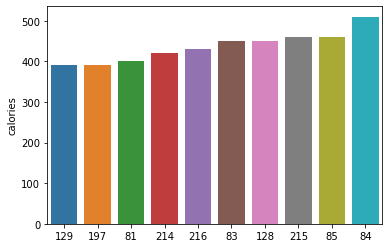

In [40]:
sns.barplot(x=calories_df.index,y='calories',data=calories_df,order=order)

In [41]:
# In the bar plot above, we can clearly see that the drink with index #84 ranks the highest. This means that drink 
# #84 has the most calories of any drink in the dataset, at around 500. In the dataset used, this drink does not 
# have a descriptive, unique name, and so index #s are used in place of a name.

In [42]:
order = total_fat_df.sort_values('total_fat_g').index

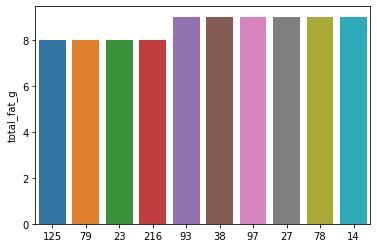

In [43]:
sns.barplot(x=total_fat_df.index,y='total_fat_g',data=total_fat_df,order=order)

In [44]:
# In this plot above, we can see that there is a 6-way tie in drinks with the most total fat. Therefore, all of these
# drinks will be counted as 'the drink with most total fat'.

In [45]:
order = trans_fat_df.sort_values('trans_fat_g').index

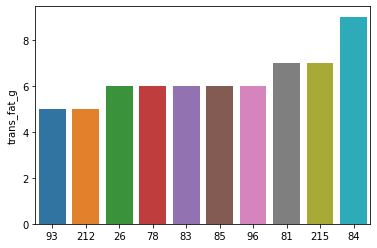

In [46]:
sns.barplot(x=trans_fat_df.index,y='trans_fat_g',data=trans_fat_df,order=order)

In [47]:
# In the plot above, drink #84 has the most trans fat, and it appears to have the most by a wide margin.

In [48]:
order = saturated_fat_df.sort_values('saturated_fat_g').index

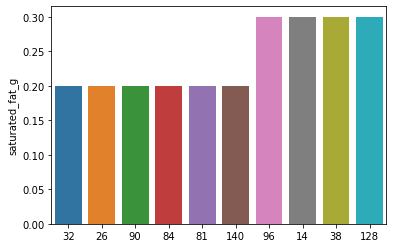

In [49]:
sns.barplot(x=saturated_fat_df.index,y='saturated_fat_g',data=saturated_fat_df,order=order)

In [50]:
# In the plot above, there appears to be a 4-way tie in drink with most saturated fat. Therefore, all 4 of these
# will be counted as having the most saturated fat.

In [51]:
order = sodium_df.sort_values('sodium_mg').index

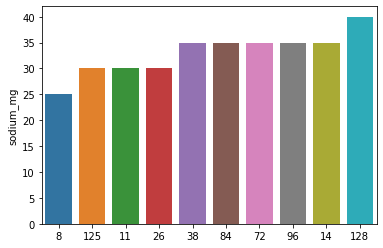

In [52]:
sns.barplot(x=sodium_df.index,y='sodium_mg',data=sodium_df,order=order)

In [53]:
# In the plot above, drink #128 has the most sodium.

In [54]:
order = total_carbohydrates_df.sort_values('total_carbohydrates_g').index

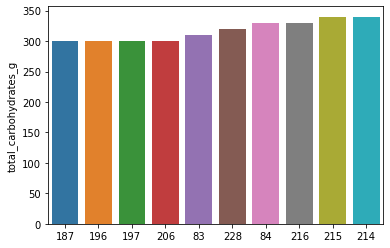

In [55]:
sns.barplot(x=total_carbohydrates_df.index,y='total_carbohydrates_g',data=total_carbohydrates_df,order=order)

In [56]:
# In the plot above, drinks # 214 and 215 appear to have the highest total carbohydrates.

In [57]:
order = cholesterol_df.sort_values('cholesterol_mg').index

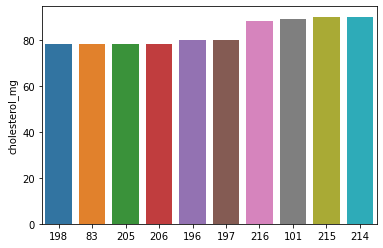

In [58]:
sns.barplot(x=cholesterol_df.index,y='cholesterol_mg',data=cholesterol_df,order=order)

In [59]:
# In the plot above, drinks 215 and 214 narrowly have the most cholesterol.

In [60]:
order = sugars_df.sort_values('sugars_g').index

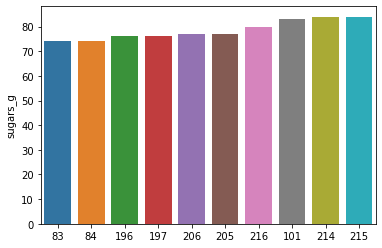

In [61]:
sns.barplot(x=sugars_df.index,y='sugars_g',data=sugars_df,order=order)

In [62]:
# In the plot above, drinks 214 and 215 have the most sugars.

In [63]:
order = calories_df2.sort_values('calories').index

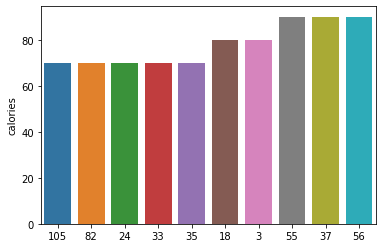

In [64]:
sns.barplot(x=calories_df2.index,y='calories',data=calories_df2,order=order)

In [65]:
# In the plot above, 55, 37 and 56 have the most calories.

In [66]:
order = fat_df2.sort_values('fat_g').index

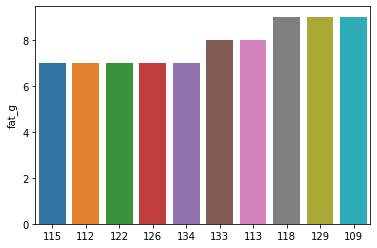

In [67]:
sns.barplot(x=fat_df2.index,y='fat_g',data=fat_df2,order=order)

In [68]:
# In the plot above, 118, 129 and 109 have the most fat.

In [69]:
order = carb_df2.index

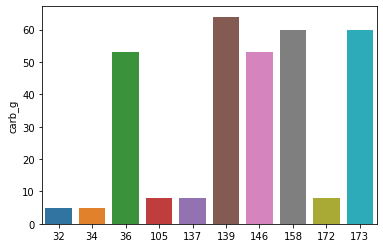

In [70]:
sns.barplot(x=carb_df2.index,y='carb_g',data=carb_df2.sort_values('carb_g'))

In [71]:
# In the plot above, 139 has the most carbs.

In [72]:
order = sodium_df2.sort_values('sodium').index

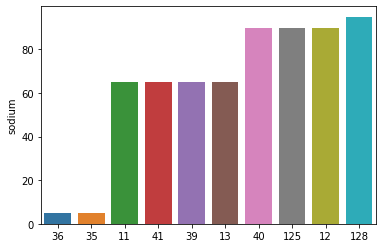

In [73]:
sns.barplot(x=sodium_df2.index,y='sodium',data=sodium_df2,order=order)

In [74]:
# In the plot above, 128 has the most sodium.

# Conclusion

At the end, in the first dataset, the two drinks indexed #214 and #215 were both the highest bar on the bar graph in total carbohydrates, cholesterol, and sugars. Other drinks that were the highest bar on multiple graphs were #84 on calories and trans fat, #128 on saturated fat and sodium, and #14 on total fat and saturated fat. Overall, according to this dataset, since #214 and #215 were the highest bars on three separate charts, they are tied for the most unhealthy drink. Drink with index # 214 corresponds with a Frappuccino Blended Coffee, Java Chip, without whipped cream, with venti nonfat milk. Drink with index # 215 corresponds to Frappuccino Blended Coffee, Java Chip, without whipped cream, with whole milk. In the second dataset, no drink was the highest bar on multiple charts, so it is hard to come to a conclusive answer for the most unhealthy drink in that dataset.

In [81]:
# Here are the attributes of the drinks indexed 214 and 215:

In [80]:
df.iloc[214]

beverage_category              Frappuccino® Blended Coffee
beverage                 Java Chip (Without Whipped Cream)
beverage_prep                            Venti Nonfat Milk
calories                                               420
total_fat_g                                              5
trans_fat_g                                              4
saturated_fat_g                                          0
sodium_mg                                                5
total_carbohydrates_g                                  340
cholesterol_mg                                          90
dietary_fibre_g                                          2
sugars_g                                                84
protein_g                                                7
vitamin_a_%_dv                                         10%
vitamin_c_%_dv                                          0%
calcium_%_dv                                           20%
iron_%_dv                                              3

In [79]:
df.iloc[215]

beverage_category              Frappuccino® Blended Coffee
beverage                 Java Chip (Without Whipped Cream)
beverage_prep                                   Whole Milk
calories                                               460
total_fat_g                                             10
trans_fat_g                                              7
saturated_fat_g                                        0.2
sodium_mg                                               15
total_carbohydrates_g                                  340
cholesterol_mg                                          90
dietary_fibre_g                                          2
sugars_g                                                84
protein_g                                                7
vitamin_a_%_dv                                          6%
vitamin_c_%_dv                                          0%
calcium_%_dv                                           15%
iron_%_dv                                              3